In [1]:
__nbid__ = '0030'
__author__  = 'Stephanie Juneau <stephanie.juneau@noirlab.edu>, Robert Nikutta <robert.nikutta@noirlab.edu>, Knut Olsen <knut.olsen@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>, Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20251205' # aaaammdd
__datasets__ = ['ls_dr9', 'sdss_dr13', 'sdss_dr17']
__keywords__ = ['science example', 'galaxies', 'object classification', 'plot:color-color', 'stars', 'image cutout', 'sia']

# Clasificación de estrellas/galaxias/QSO en los surveys DESI Legacy Imaging (DESI LIS)
por Stéphanie Juneau, Robert Nikutta, Knut Olsen y el equipo de Astro Data Lab

#### (_Traducción de [StarGalQsoLSDR9.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/StarGalQSOSeparation/StarGalQsoLSDR9.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen](#goals)
* [Avisos Legales y atribuciones](#attribution)
* [Introducción](#introduction)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Consulta al catálogo de fotometría Tractor de DECaLS](#query)
* [Graficar Resultados](#plots)
* [Contribuciones de los usuarios](#users)
* [Recortes de imágenes para subconjuntos de objetos](#cutouts)

<a class="anchor" id="goals"></a>
# Objetivos
* Colores ópticos e infrarrojos de los catálogos de tractores de imágenes DESI.
* Clasificar objetos que puedan ser estrellas, galaxias o QSO

# Resumen
En este notebook, investigamos los colores ópticos e infrarrojos de fuentes astronómicas detectadas en los Legacy Surveys (LS) de imágenes DESI. La novena publicación de datos de este estudio de imágenes comprende ~2 mil millones de estrellas, galaxias y cuásares (o QSO: objetos cuasi estelares).

Productos y servicios de Astro Data Lab utilizados aquí:
* La base de datos DR9 de Legacy Surveys (LS)
* Servidor de notebooks Jupyter
* Cliente de Consultas
* Herramienta de recorte de imágenes similar al SIA de Data Lab

A continuación, consultamos la base de datos, calculamos colores, graficamos algunas combinaciones de colores y tenemos en cuenta el "tipo" de fuente definido a partir de la forma del perfil de luz para diferenciar entre clases de objetos.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


<a class="anchor" id="introduction"></a>
# Introducción

*Las elípticas son rojas; Las espirales son azules.*

Un survey de imágenes incluye un zoológico de diferentes objetos astronómicos. Hay estrellas en primer plano de nuestras propias galaxias, la Vía Láctea, y galaxias en segundo plano a diferentes distancias, incluidas QSO con agujeros negros supermasivos en acreción activa.

<figura>
<img src="DECaLS_noLabels.jpg", align="center", ancho=700>
<figcaption><b>Figura 1.</b> Pequeña sección de la imagen en color <i>grz</i> del Legacy Surveys Viewer (http://legacysurvey.org/viewer) alrededor de RA=253,3, Dec=29,2 grados.</figcaption>
</figura>

En preparación para DESI ([Experimento espectroscópico de energía oscura](http://desi.lbl.gov)), se utilizarán los Legacy Surveys de imágenes (incluido DECaLS) para seleccionar más de 30 millones de objetivos para la campaña de espectroscopia. La muestra principal de DESI comprenderá galaxias con líneas de emisión (ELG), galaxias rojas luminosas (LRG) y QSO. También habrá un Bright Galaxy Survey (BGS) dirigido a una muestra de magnitud limitada (*r*<19,5), incluidas estrellas dentro de la Vía Láctea.

<figura>
<img src="DECaLS_Labels.jpg", align="center", ancho=700>
<figcaption><b>Figura 2.</b> La misma sección de la imagen LS que en la Figura 1, pero con etiquetas de un algoritmo de selección de objetivos preliminar (aplicado a las primeras observaciones de DR2).</figcaption>
</figura>

## Información sobre los Surveys Legacy (LS)
LS cubre ~19.000 grados² en las bandas *g, r, z* hasta profundidades de *g*=24,7, *r*=23,9, *z*=23,0. Los datos infrarrojos WISE también se extraen en la ubicación de las fuentes LS. La novena publicación de datos (DR9) cubre toda la huella: datos de DECaLS sobre la parte sur; Datos MzLS y BASS que cubren la parte norte de la huella de imágenes de Legacy Surveys.

Puede leer más sobre LS en la página de el survey de Data Lab [(aquí)](https://datalab.noirlab.edu/ls/ls.php) y en el sitio web del equipo de Legacy Surveys [(aquí)](http://legacysurvey.org).

## Magnitudes y colores

Las magnitudes se obtienen a través de un conjunto de filtros similar al conjunto *u,g,r,i,z* utilizado para SDSS. En este trabajo utilizamos:

* *g,r,z* de la Cámara de Energía Oscura (DECam)
* *Fotometría forzada W1, W2* en [WISE](http://www.nasa.gov/mission_pages/WISE/main/) canales 1 y 2 (3,4 y 4,6 micrones)

Los colores se definen como una diferencia entre magnitudes en dos bandas. Un color "más rojo" significa que el objeto es comparativamente más brillante en la banda más roja (es decir, de longitud de onda más larga). Por el contrario, un color "más azul" significa que el objeto es comparativamente más brillante en la banda más azul (es decir, de longitud de onda más corta).

Usaremos los siguientes colores:
* *g-r*
* *r-z*
* *z-W1*
* *W1-W2*

## Formas/tipos de objetos

La forma del objeto (perfil de luz 2D) es modelada por [the Tractor](http://thetractor.org) ([Lang, Hogg & Mykytyn](http://adsabs.harvard.edu/abs/2016ascl.soft04008L)) como parte del procedimiento para calcular la fotometría del modelo.

Posibles formas para LS DR9:
* PSF (función de dispersión de puntos: el tamaño variará según se vean las observaciones)
* REX (perfil exponencial redondo; galaxias espirales redondas)
* EXP (perfil exponencial; galaxias espirales)
* DEV (perfil deVaucouleurs; galaxias elípticas)
* SER (Perfil Sersic)
* DUP (tipo duplicado para fuentes Gaia que forman parte de una fuente extendida en Tractor - flujo cero asignado)

<figura>
<img src="Gals_Qso.jpg", align="izquierda", ancho=600>
<figcaption><b>Figura 3.</b> Imágenes de galaxias que incluyen una galaxia elíptica cercana, una galaxia espiral cercana y un QSO.</figcaption>
</figura>

Resumen de ajuste y asignación de formas:
<ol>
<li>Ajustar todas las fuentes con PSF y REX; conservar si es significativo (5 sigma); de lo contrario, desecharlo.
<li>Si REX es un mejor modelo, ajustar nuevamente con EXP y DEV; mantener si mejora 3 sigma
<li>Ajustar de nuevo con SER (perfil Sersic; mantener si se produce una mejora adicional de 3 sigma)
</ol>

Tenga en cuenta que el tipo **SER** (Sersic) se introdujo recientemente en DR9. Las versiones anteriores incluían un tipo **COMP** (Compuesto) para objetos con componentes exponenciales y deVaucouleurs en su perfil total. Antes de DR4, se utilizaba el modelo **SIMP** en lugar del actual **REX** (Exponencial Redondo).

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [1]:
# De terceros
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from astropy.utils.data import download_file  # importar archivo desde URL
%matplotlib inline

# De Data Lab
from dl import queryClient as qc

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="query"></a>
# Consultar catálogo de fotometría Tractor del LS DR9

La fotometría se deriva del modelado de fuentes de Tractor, y la base de datos incluye fotometría del modelo, tipo (forma), así como fotometría de apertura en varios tamaños de apertura. En este trabajo, utilizaremos magnitudes del modelo Tractor.

La base de datos se llama **ls_dr9** e incluye varias tablas. Usaremos la tabla **tractor**, seleccionada para contener objetos primarios en toda la huella (como nota, **tractor_n** y **tractor_s** cubren la huella norte y sur, respectivamente). Los nombres y descripciones de las columnas se pueden encontrar en la [Interfaz de consulta del laboratorio de datos](https://datalab.noirlab.edu/query.php?name=ls_dr9.tractor) o utilizando el servicio del Protocolo de acceso a tablas (TAP) con, por ejemplo, TOPCAT. En ambos casos, nos interesa **ls_dr9.tractor**.

In [2]:
# Escribir declaración de consulta (sql) como una cadena
# NOTA: las comillas triples nos permiten dividir la cadena en varias líneas
query = """
        SELECT dered_mag_g as gmag, dered_mag_r as rmag, dered_mag_z as zmag, 
               dered_mag_w1 as w1mag, dered_mag_w2 as w2mag, type,
               snr_g, snr_r, snr_z, snr_w1, snr_w2, ra, dec 
        FROM ls_dr9.tractor
        WHERE (snr_g>5 and snr_r>5 and snr_z>5 and snr_w1>5 and snr_w2>5 and random_id<0.1)
        LIMIT 400000"""
 
# dered_mag_g,r,z = Magnitudes AB en bandas DECam g,r,z corregidas por enrojecimiento galáctico
# dered_mag_w1,w2 = Magnitudes AB en las bandas WISE W1 ​​y W2 corregidas por enrojecimiento galáctico
# tipo = tipo de objeto (PSF, SIMP, EXP, DEV, COMP)
# snr_g,r,z = relaciones señal-ruido (S/N) precalculadas en bandas g,r,z
# snr_w1,w2 = relaciones señal-ruido (S/N) precalculadas en las bandas W1 y W2
# ra,dec = coordenadas celestes
# random_id = ID aleatorio (0-100) para seleccionar una pequeña fracción de objetos distribuidos aleatoriamente en el cielo
#
# DÓNDE: requisito de que S/N>5 en cada banda LS
# LÍMITE: devuelve 400.000 filas que satisfacen la consulta

print(query)


        SELECT dered_mag_g as gmag, dered_mag_r as rmag, dered_mag_z as zmag, 
               dered_mag_w1 as w1mag, dered_mag_w2 as w2mag, type,
               snr_g, snr_r, snr_z, snr_w1, snr_w2, ra, dec 
        FROM ls_dr9.tractor
        WHERE (snr_g>5 and snr_r>5 and snr_z>5 and snr_w1>5 and snr_w2>5 and random_id<0.1)
        LIMIT 400000


In [3]:
# Ejecute la consulta de forma sincrónica si es corta (por ejemplo, LIMIT<=400,000)
result = qc.query(sql=query, fmt='pandas')

# Opcionalmente, guarde el resultado en myDB (descomente el comentario a continuación y comente arriba ANTES de ejecutar la celda)
# tmp = qc.query(sql=consulta, out='mydb://lsdr9_random0p1', drop=True)

# Si la consulta es más larga, se puede ejecutar de forma asincrónica (consulte el notebook "Cómo_usar_el_QueryClient")

In [4]:
# Si se guarda en mydb, puede consultar la tabla
# resultado = qc.query(sql="SELECCIONAR * DE mydb://lsdr9_random0p1", fmt='pandas')

In [5]:
# Imprima algunas filas del resultado (pandas DataFrame)
print(len(result))
print(result[:5])

268005
        gmag       rmag       zmag      w1mag      w2mag type        snr_g  \
0  23.044521  21.341413  20.615875  20.024673  20.628265  DEV    17.896101   
1  15.763890  15.097550  14.893347  16.105503  16.806711  PSF  1283.366700   
2  19.106127  17.751947  16.931606  17.608112  18.223060  PSF   487.070680   
3  15.658857  15.202118  15.095008  16.512575  17.174395  PSF  2558.850000   
4  19.217453  18.265730  17.849886  18.688995  19.460524  PSF   424.227020   

         snr_r        snr_z      snr_w1      snr_w2          ra        dec  
0    48.675056    55.289436   18.349790    5.133045   73.845016  -8.516546  
1   617.863160   351.374180  297.433840  113.184044  155.422672 -30.047779  
2   822.325100   999.688230  119.268425   36.151608  188.249308  -7.802713  
3  3599.872600  2017.284900  261.863160   97.214570  351.941695  31.012169  
4   556.729800   535.578000   48.087390   12.209085   47.114337  -0.168825  


<a class="anchor" id="vars"></a>
# Definir variables útiles

In [6]:
# Colores
g_r   = result['gmag'] - result['rmag']
r_z   = result['rmag'] - result['zmag']
z_w1  = result['zmag'] - result['w1mag']
w1_w2 = result['w1mag'] - result['w2mag']

# Clasificación por tipo de objeto
objtype = result['type']

# Lista de tipos de objetos (ignorando DUP, que tienen cero flujos)
typeList = ['All','PSF','REX','EXP','DEV','SER']

<a class="anchor" id="plots"></a>
# Graficar resultados

## Diagrama óptico color-color

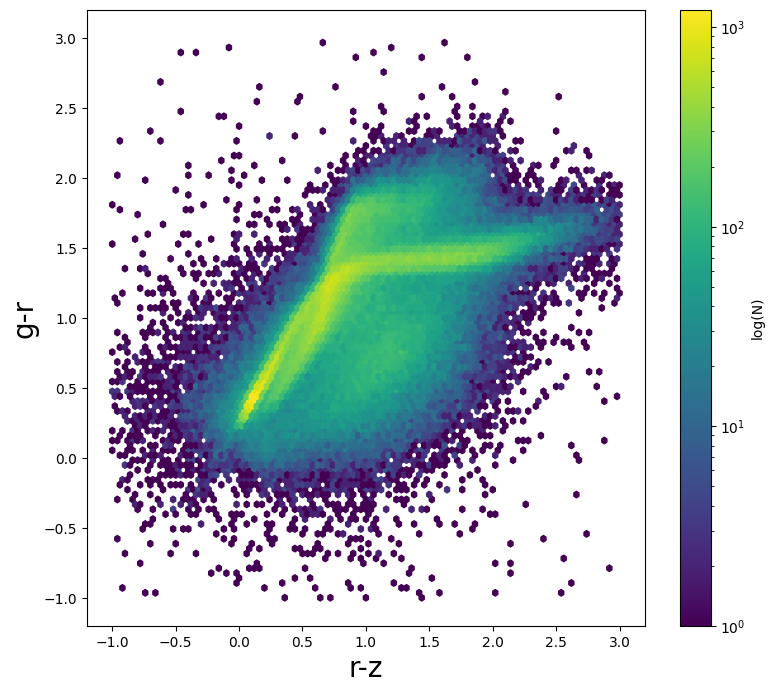

In [7]:
# colores r-z vs g-r

# Histograma 2D de objetos
fig, ax1 = plt.subplots(1, 1, figsize=(9, 8))
im1 = ax1.hexbin(r_z, g_r, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1., 3, -1., 3))
ax1.set_xlabel('r-z',fontsize=20)
ax1.set_ylabel('g-r',fontsize=20)

# barra de colores
cb = plt.colorbar(im1,label='log(N)')

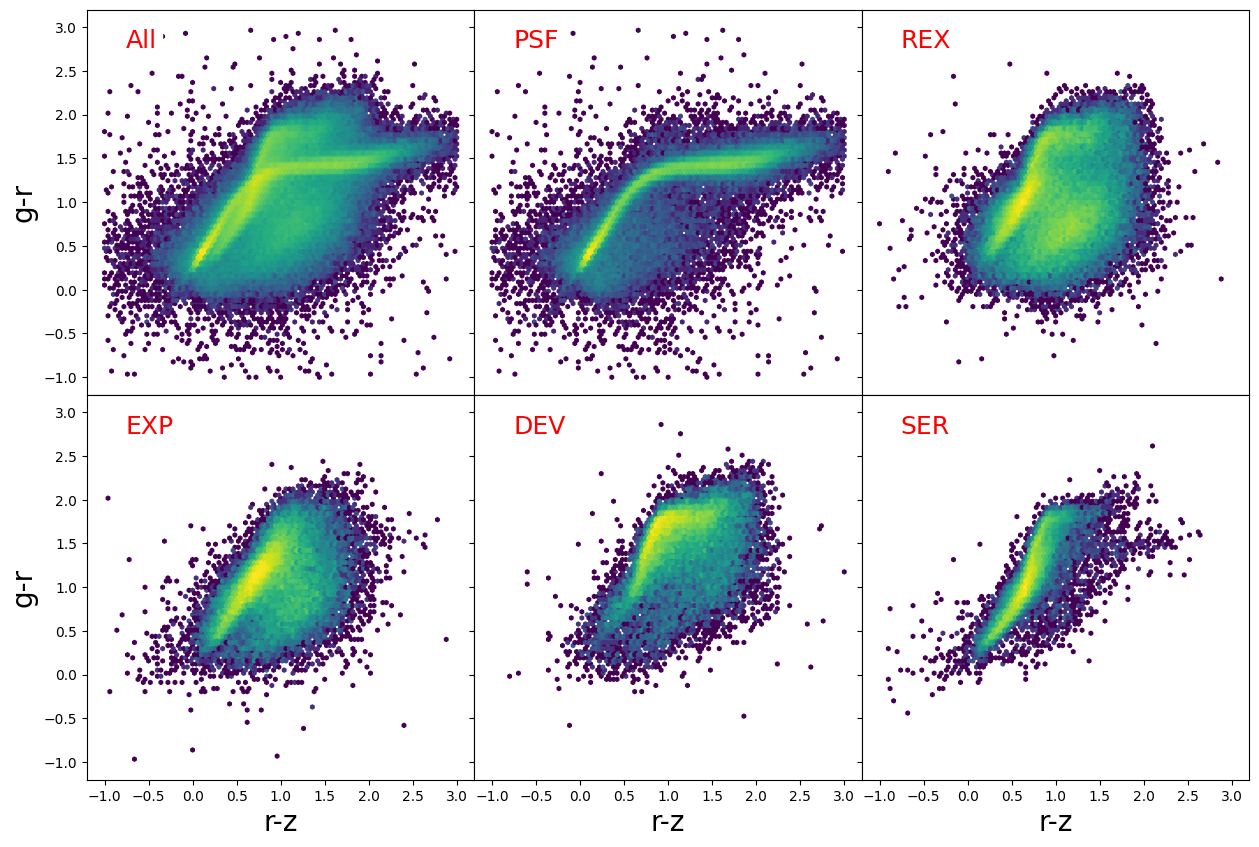

In [8]:
col0 = r_z   # color r-z
col1 = g_r   # color g-r

# Defina la figura para que tenga 6 paneles: 2 filas X 3 columnas (con ejes compartidos)
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex='all', sharey='all')
axes = axes.flatten()   # aplanar el objeto de los ejes para poder recorrerlo

for i,typ in enumerate(typeList):
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(col0),dtype='bool')   # para todos los objetos: matriz de unos
    else:
        selec = (objtype==typ)    # para cada tipo, seleccione en el parámetro de tipo
    # Histograma 2D de objetos con bins hexagonales
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1., 3, -1., 3))
    if i>=3: ax.set_xlabel('r-z',fontsize=20)   # solo etiqueta el eje x para la segunda (última) fila
    if i%3==0: ax.set_ylabel('g-r',fontsize=20) # solo etiqueta el eje y para la primera columna
    # Etiquete el tipo en cada panel (fuente roja sobre fondo blanco)
    ax.text(0.1,0.9,typ,transform=ax.transAxes,fontsize=18,color='red',backgroundcolor='white')

plt.subplots_adjust(wspace=0., hspace=0.)

plt.show()

## Colores óptico-infrarrojo

Combinar información de observaciones DECaLS/BASS/MzLS ópticas/infrarrojas cercanas y de observaciones de infrarrojo medio WISE. Estos últimos se extrajeron mediante "fotometría forzada" en la posición de los objetos del LS.

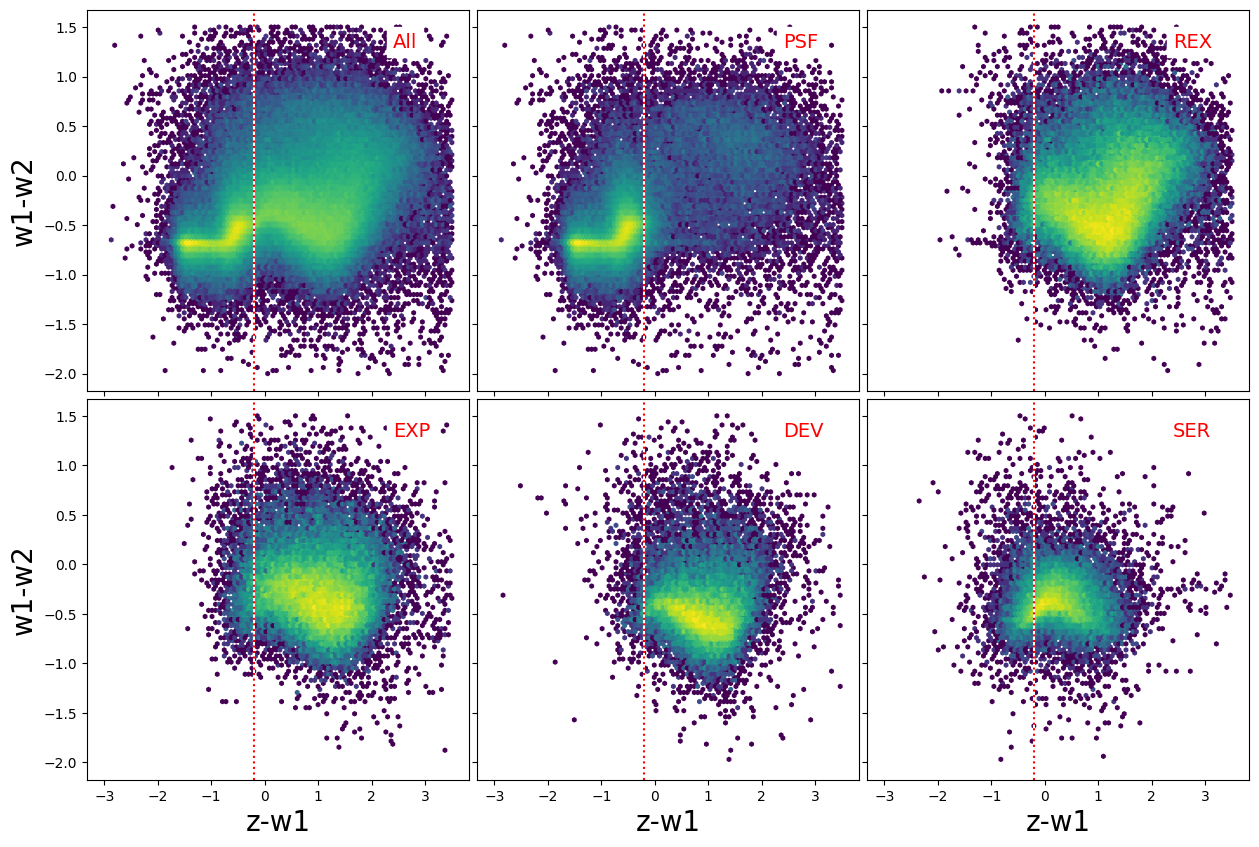

In [9]:
# Primero, pruebe z-W1 versus al color infrarrojo W1-W2
col0 = z_w1
col1 = w1_w2

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex='all', sharey='all')
axes = axes.flatten()

for i,typ in enumerate(typeList):
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(objtype),dtype='bool')
    else:
        selec = (objtype==typ)
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3, 3.5, -2., 1.5))
    if i>=3: ax.set_xlabel('z-w1',fontsize=20)
    if i%3==0: ax.set_ylabel('w1-w2',fontsize=20)
    ax.text(0.8,0.9,typ,transform=ax.transAxes,fontsize=14,color='red',backgroundcolor='white')
    ax.axvline(-0.2,color='w',ls='-')
    ax.axvline(-0.2,color='r',ls=':')

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()

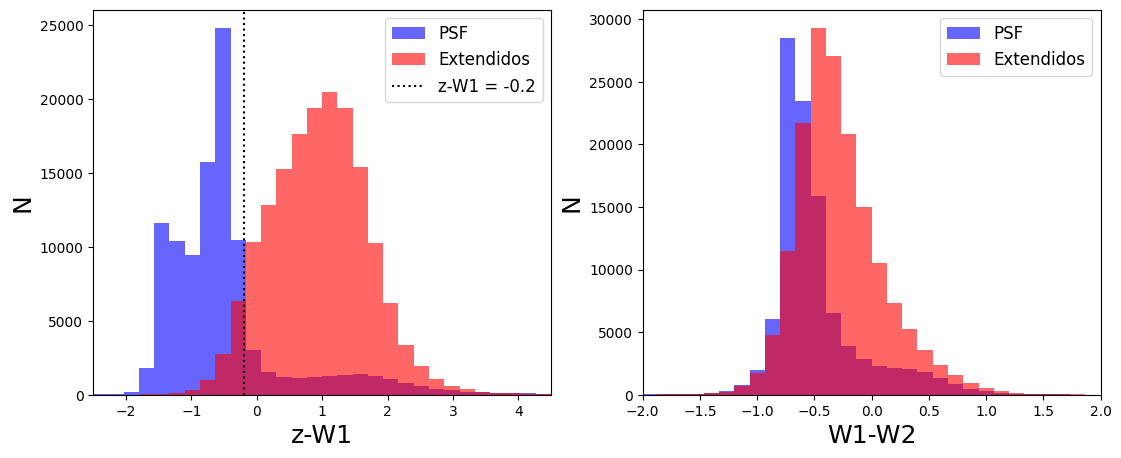

In [10]:
is_psf = (objtype=='PSF')

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes = axes.flatten()

colors = [z_w1, w1_w2]
colnames = ['z-W1', 'W1-W2']
xlims = [[-2.5,4.5],[-2.,2.]]

for i,col in enumerate(colors):
    ax = axes[i]
    ax.hist(col[is_psf], 30, range=xlims[i], color='b', alpha=0.6, label='PSF')
    ax.hist(col[~is_psf], 30, range=xlims[i], color='r', alpha=0.6, label='Extendidos')
    ax.set_xlabel(colnames[i],fontsize=18)
    ax.set_ylabel('N',fontsize=18)
    ax.set_xlim(xlims[i])
    if i==0: ax.axvline(-0.2, ls=':', color='k', label='z-W1 = -0.2')
    ax.legend(fontsize=12)

### Notas:

En las figuras anteriores, podemos ver que el color *z-W1* tiene mucho más poder de separación entre las fuentes puntuales (PSF) y los objetos extendidos (galaxias de tipo REX, EXP, DEV o SER). Es decir, la mayoría de los objetos con tipo=PSF tienen *z-W1*<-0.2 (línea de puntos vertical). Por el contrario, la mayoría de las galaxias extendidas tienen *z-W1* >-0,2 (línea de puntos vertical). Sin embargo, estas diferentes categorías se superponen más fuertemente en sus colores *W1-W2*. A continuación, haremos una combinación del color óptico *g-r* con el color de IR cercano/IR medio *z-W1* para lograr una mejor separación entre Estrella y Galaxia.

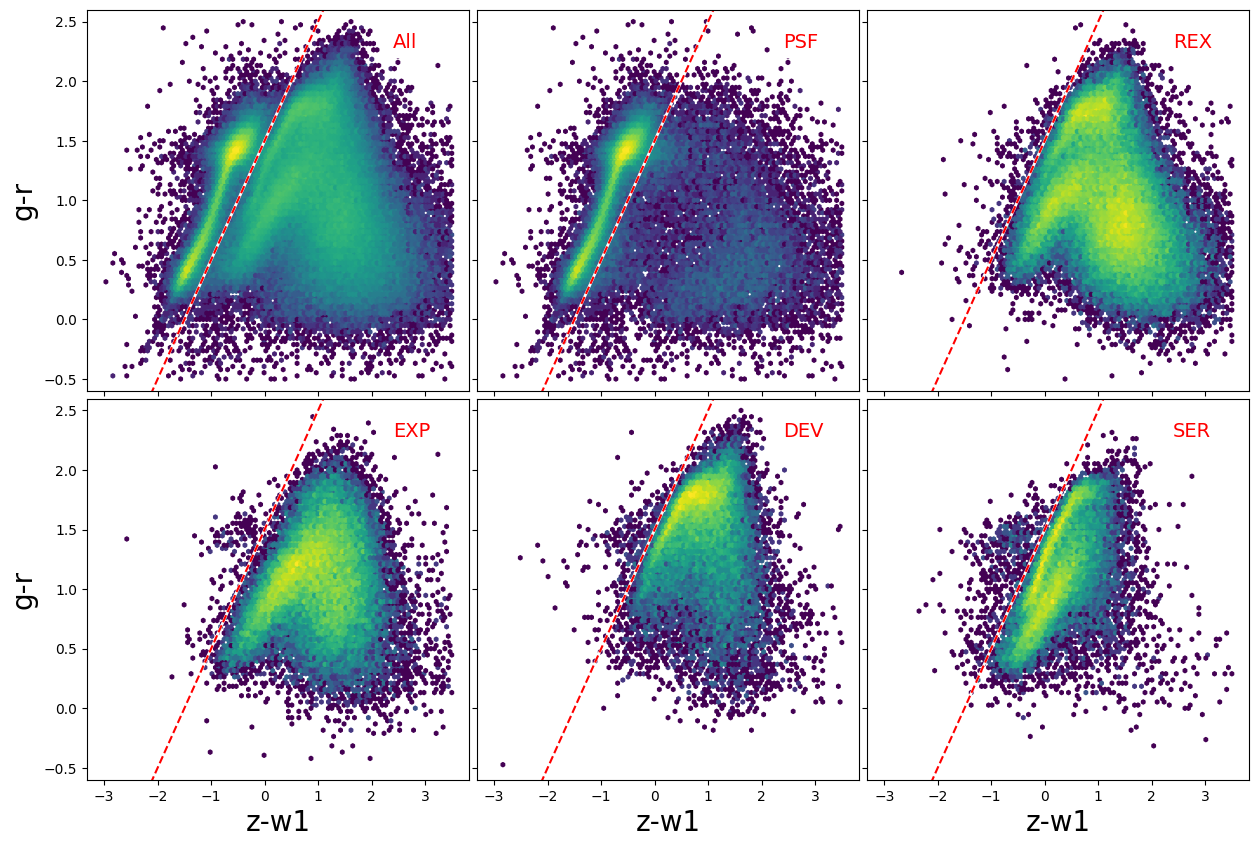

In [11]:
# Combine g-r con el color z-W1 (este último tiene más poder de separación que W1-W2)
col0 = z_w1
col1 = g_r

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex='all', sharey='all')
axes = axes.flatten()

x = np.arange(-2.3,2.3,0.05)

for i,typ in enumerate(typeList):
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(objtype),dtype='bool')
    else:
        selec = (objtype==typ)
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3, 3.5, -0.5, 2.5))
    if i>=3: ax.set_xlabel('z-w1',fontsize=20)
    if i%3==0: ax.set_ylabel('g-r',fontsize=20)
    ax.text(0.8,0.9,typ,transform=ax.transAxes,fontsize=14,color='red',backgroundcolor='white')
    ax.plot(x, 1.0*x+1.5, '-',lw=2,color='w')
    ax.plot(x, 1.0*x+1.5, '--',color='red')
    ax.set_ylim(-0.6,2.6)

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()

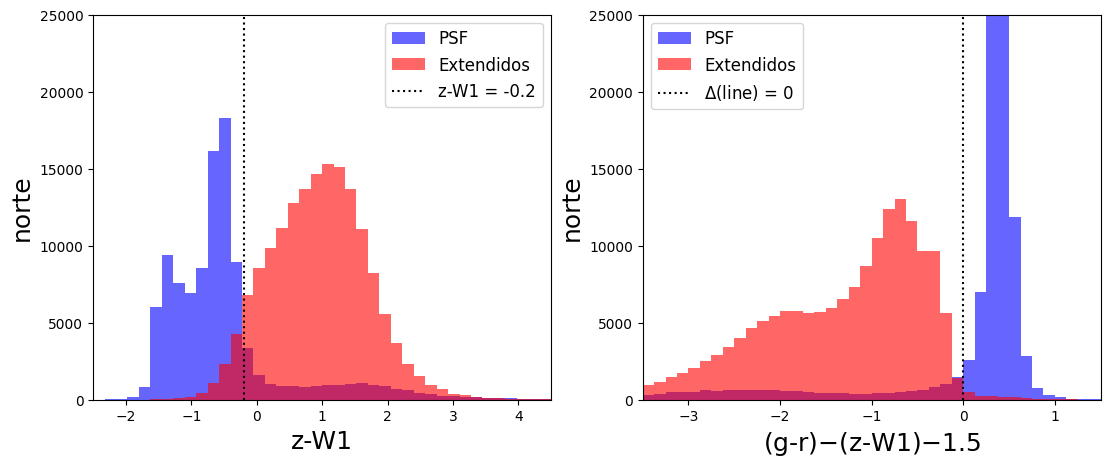

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes = axes.flatten()

# g_r_line = 1.0*z_w1+1.6

colors = [z_w1, g_r-z_w1-1.5]
colnames = ['z-W1', '(g-r)$-$(z-W1)$-$1.5']
xlims = [[-2.5,4.5],[-3.5,1.5]]

for i,col in enumerate(colors):
    ax = axes[i]
    ax.hist(col[is_psf], 40, range=xlims[i], color='b', alpha=0.6, label='PSF')
    ax.hist(col[~is_psf], 40, range=xlims[i], color='r', alpha=0.6, label='Extendidos')
    ax.set_xlabel(colnames[i],fontsize=18)
    ax.set_ylabel('norte',fontsize=18)
    ax.set_xlim(xlims[i])
    ax.set_ylim(0,2.5e4)    ## Comente este límite de rango 'y' para ver los histogramas completos
    if i==0: ax.axvline(-0.2, ls=':', color='k', label='z-W1 = -0.2')
    if i==1: ax.axvline(0., ls=':', color='k', label='$\Delta$(line) = 0')
    ax.legend(fontsize=12)

### Notas:
Como esperábamos, esta combinación de colores logra una mejor separación entre fuentes puntuales (principalmente estrellas pero posiblemente algunos QSO) y objetos extendidos (galaxias). La línea roja se dibuja empíricamente para ayudar a guiar el ojo. Podemos ver que la gran mayoría de fuentes puntuales (PSF) se encuentran a la izquierda de la línea. Por el contrario, la gran mayoría de los objetos extendidos (galaxias de tipo REX, EXP, DEV o SER) se encuentran a la derecha de la línea. Curiosamente, también hay una estructura notable como parte de las distribuciones bi-variadas con características en forma de crestas orientadas aproximadamente paralelas a la línea discontinua y una amplia nube de puntos hacia los colores más rojos *z-W1*. Se dejan investigaciones adicionales al lector, excepto que mostraremos cómo recuperar colores y recortes de imágenes WISE para objetos PSF en el lado azul versus rojo de la línea discontinua en la sección llamada: [Recortes de imágenes para subconjuntos de objetos](#cutouts).

<a class="anchor" id="users"></a>
# Contribuciones de usuarios

Inspirándose en este notebook, algunos usuarios han llevado el análisis más allá. A continuación, mostraremos dos de estas contribuciones realizadas por estudiantes de posgrado durante las sesiones de hackeo (o coding). Primero, aquí hay un ejemplo del trabajo con fotometría de múltiples épocas de Dustin Lang.

## Agregar información de variabilidad
La variabilidad de la fotometría puede agregar información dado que los QSO, las galaxias y las estrellas tienen un comportamiento diferente. Algunas de las bases de datos de Data Lab incluyen fotometría de múltiples épocas (como el [Catálogo de fuentes de NOIRLab](https://datalab.noirlab.edu/nscdr2/index.php)). Legacy Surveys incluye múltiples épocas de fotometría WISE, pero aún no múltiples épocas en las bandas óptica/infrarroja cercana.

Las imágenes de DECam en el [NOIRLab Astro Data Archive](https://astroarchive.noirlab.edu/) se pueden extraer en campos con observaciones repetidas, como los campos de supernova DES que se superponen con DECaLS.

<figura>
<img src="time_series_2a.png", align="centro", ancho=800>
<figcaption><b>Figura:</b> Magnitudes en tres bandas en función del tiempo para un cuásar SDSS conocido. Cortesía de Dustin Lang (Univ. de Toronto).  </figcaption>
</figura>

## Agregar información espectroscópica desde SDSS
Podemos usar la tabla de comparación cruzada previa entre SDSS DR17 y LS DR9 ([sdss_dr17.x1p5__specobj__ls_dr9__tractor](https://datalab.noirlab.edu/query.php?name=sdss_dr17.x1p5__specobj__ls_dr9__tractor)) para ejecutar una consulta conjunta uniéndose a "specobjid" para SDSS y "ls_id" para LS. Bela Abolfathi (UC Irvine) comenzó este trabajo como parte de una sesión de hackeo con la beca de ciencia de datos LSSTC utilizando SDSS DR13 y LS DR3. Aquí se ha adaptado para funcionar con SDSS DR17 y LS DR9.

In [13]:
query_xm = """
SELECT 
    X.ra1 AS ra_sdss, X.dec1 AS dec_sdss,
    S.class,
    L.dered_mag_g as gmag, L.dered_mag_r as rmag, L.dered_mag_z as zmag
FROM
    sdss_dr17.x1p5__specobj__ls_dr9__tractor AS X 
JOIN
    sdss_dr17.specobj AS S ON X.id1 = S.specobjid 
JOIN
    ls_dr9.tractor AS L ON X.id2 = L.ls_id
WHERE (L.snr_g>5 and L.snr_r>5 and L.snr_z>5 and L.snr_w1>5 and L.snr_w2>5)
LIMIT 500000
"""
print(query_xm) # imprimir en pantalla la declaración de la consulta


SELECT 
    X.ra1 AS ra_sdss, X.dec1 AS dec_sdss,
    S.class,
    L.dered_mag_g as gmag, L.dered_mag_r as rmag, L.dered_mag_z as zmag
FROM
    sdss_dr17.x1p5__specobj__ls_dr9__tractor AS X 
JOIN
    sdss_dr17.specobj AS S ON X.id1 = S.specobjid 
JOIN
    ls_dr9.tractor AS L ON X.id2 = L.ls_id
WHERE (L.snr_g>5 and L.snr_r>5 and L.snr_z>5 and L.snr_w1>5 and L.snr_w2>5)
LIMIT 500000



In [14]:
df_xm = qc.query(sql=query_xm,fmt='pandas')

In [15]:
g_r = df_xm['gmag'] - df_xm['rmag']
r_z = df_xm['rmag'] - df_xm['zmag']
objtype = df_xm['class']
typeList = ['STAR','GALAXY','QSO']

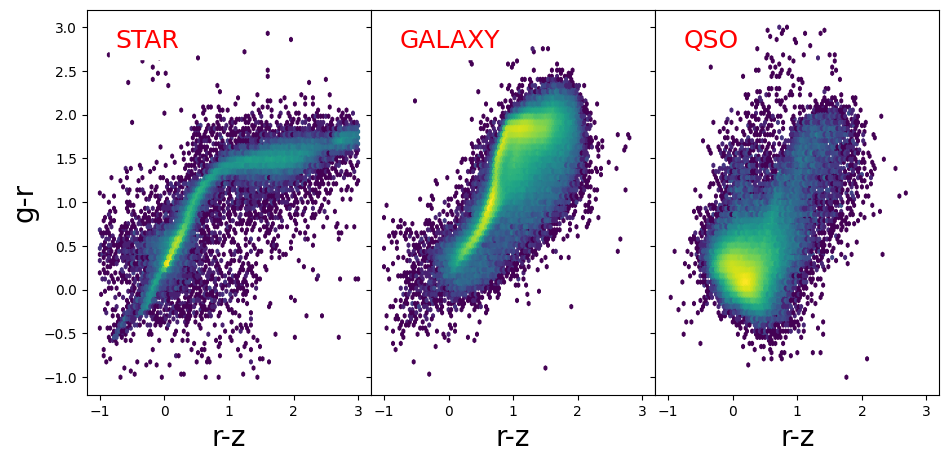

In [16]:
# Definir la figura para que tenga 3 paneles: 1 fila X 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(11, 5), sharey='all')
axes = axes.flatten()   # aplanar el objeto de los ejes para poder recorrerlo

for i,typ in enumerate(typeList):
    ax = axes[i]
    selec = (objtype==typ)    # para cada tipo, seleccionar en el parámetro de tipo
    # Histograma 2D de objetos con bins hexagonales
    im = ax.hexbin(r_z[selec], g_r[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1., 3, -1., 3))
    ax.set_xlabel('r-z',fontsize=20)
    if i%3==0: ax.set_ylabel('g-r',fontsize=20)
    # Etiquetar el tipo en cada panel (letras rojas sobre fondo blanco)
    ax.text(0.1,0.9,typ,transform=ax.transAxes,fontsize=18,color='red',backgroundcolor='white')

plt.subplots_adjust(wspace=0., hspace=0.)

plt.show()

<figure><figcaption><b>Figura:</b> Diagramas color-color de la fotometría DECaLS DR9 dividida por clases espectrales SDSS DR17.</figcaption></figure>


<figura>
<img src="hack1.jpg", align="center", ancho=900>
<figcaption><b>Figura:</b> Diagramas color-color originales de la fotometría DECaLS DR3 dividida por clases espectrales SDSS DR3. Versión ligeramente modificada de la figura de Bela Abolfathi (UC Irvine). </figcaption>
</figura>

## Aplicación de aprendizaje automático

Se construyó un conjunto de entrenamiento utilizando fotometría DECaLS DR3 y clasificaciones SDSS (DR13 y DR12Q). Este trabajo preliminar fue realizado por Jan-Torge Schindler (Univ. de Arizona). Las actualizaciones podrían incluir el uso de más parámetros además de la fotometría (por ejemplo, tipo, chi^2).

<figura>
<img src="hack2.jpg", align="center", ancho=500>
<figcaption><b>Figura:</b> Matriz de confusión que compara la clasificación verdadera de SDSS y el resultado de la clasificación de Random Forest. Cortesía de JT Schindler (Univ. de Arizona). </figcaption>
</figura>

Para ver un ejemplo de aplicación de la clasificación Random Forest for Star/Galaxy aplicada a el survey Palomar Transient Factory (PTF), consulte [Miller et al (2017)](http://adsabs.harvard.edu/abs/2017AJ....153...73M).

<a class="anchor" id="cutouts"></a>
# Recortes de imágenes para subconjuntos de objetos.

El NOIRLab Astro Data Lab ha desarrollado una herramienta de acceso simple a imágenes (SIA), que devuelve la lista de posibles imágenes dada una ubicación (AR, Dec). A continuación, utilizamos un servicio de recorte de imágenes en NERSC para recuperar imágenes jpeg en color *g,r,z* y *W1,W2*.

Obtendremos imágenes de objetos con "type=PSF", y seleccionaremos aleatoriamente seis con un color azul *z-W1* esperado para el lugar estelar, y seis con un color rojo *z-W1* correspondiente a la nube de puntos al lado derecho de los diagramas color-color de la sección anterior.

## Seleccionar subconjuntos y definir variables

In [17]:
# Propiedades para seleccionar submuestras de interés.
objtype = result['type'].values    # ".values" se convierte en una matriz numpy
col1 = z_w1.values
w1   = result['w1mag'].values
zmag = result['zmag'].values

# Seleccione un subconjunto interesante de puntos
selec = (objtype=='PSF')&(w1>18)&(w1<19.5) # Fuente puntual (type=PSF) y W1 brillante (18 < W1[AB] < 19,5)
red   = (col1>1)&(col1<2)                  # lado rojo: 1 < z-W1 < 2
blue  = (col1>-0.8)&(col1<-0.5)            # lado azul: -0,8 < z-W1 < -0,5

# Recuperar por posición (AR, Dec)
ra  = result['ra'].values
dec = result['dec'].values

idx = np.arange(ra.size)

# Índices que cumplen ambos criterios
psf_red = idx[selec&red]
psf_blue = idx[selec&blue]

# Selección aleatoria
selec_blue = np.random.choice(psf_blue,6,replace=False)
selec_red  = np.random.choice(psf_red,6,replace=False)

# Definir AR, Dec en los lados azul y rojo z-W1
ra_blue  = ra[selec_blue]
dec_blue = dec[selec_blue]
ra_red  = ra[selec_red]
dec_red = dec[selec_red]

# Defina las magnitudes z y W1 en los lados azul y rojo de z-W1 
zmag_blue = zmag[selec_blue]
w1_blue   = w1[selec_blue]
zmag_red  = zmag[selec_red]
w1_red    = w1[selec_red]

## Función para recuperar recortes

In [18]:
def make_cutout_comparison_table(ra_in, dec_in):
    """
    Obtener imágenes JPEG en color DECaLS y WISE de la herramienta de recorte del equipo Legacy Surveys en NERSC
    """
    de_img = []
    wi_img = []
    count = 0
    
    for i in range(len(ra_in)):
        de_cutout_url = 'https://legacysurvey.org/viewer/jpeg-cutout/?ra=%g&dec=%g&layer=ls-dr9&bands=grz&pixscale=0.2&size=200' % (ra_in[i],dec_in[i])
        img = plt.imread(download_file(de_cutout_url,cache=True,show_progress=False,timeout=600))
        de_img.append(img)
        count += 1
        
        wi_cutout_url = 'https://legacysurvey.org/viewer/jpeg-cutout/?ra=%g&dec=%g&layer=unwise-neo6&pixscale=0.4&size=100' % (ra_in[i],dec_in[i])
        img = plt.imread(download_file(wi_cutout_url,cache=True,show_progress=False,timeout=600))
        wi_img.append(img)
        count += 1
        print(f"{count} de 12 imágenes cargadas.")

    return de_img,wi_img

## Función para generar gráficos.

In [19]:
def plot_de_wi(de_img,wi_img,zmag,w1mag):
    """
    Graficar imágenes en dos filas con 6 imágenes en cada fila (Arriba: DECaLS grz; Abajo: WISE W1/W2)
    Etiquetar la magnitud de la banda z en las imágenes superiores; Etiquete la magnitud W1 en las imágenes inferiores.
    """
    fig = plt.figure(figsize=(12,4))

    for i in range(len(de_img)):
        ax = fig.add_subplot(2,6,i+1)
        ax.imshow(de_img[i])
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.tick_params(axis='both',which='both',length=0)
        ax.text(0.1,0.9,'z=%.1f'%zmag[i],transform=ax.transAxes,fontsize=12,color='white')

        ax = fig.add_subplot(2,6,i+7)
        ax.imshow(wi_img[i])
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.tick_params(axis='both',which='both',length=0)
        ax.text(0.1,0.9,'W1=%.1f'%w1mag[i],transform=ax.transAxes,fontsize=12,color='white')

    plt.subplots_adjust(wspace=0.02, hspace=0.03)

## Montaje para "Azul" de *z-W1*

2 de 12 imágenes cargadas.
4 de 12 imágenes cargadas.
6 de 12 imágenes cargadas.
8 de 12 imágenes cargadas.
10 de 12 imágenes cargadas.
12 de 12 imágenes cargadas.


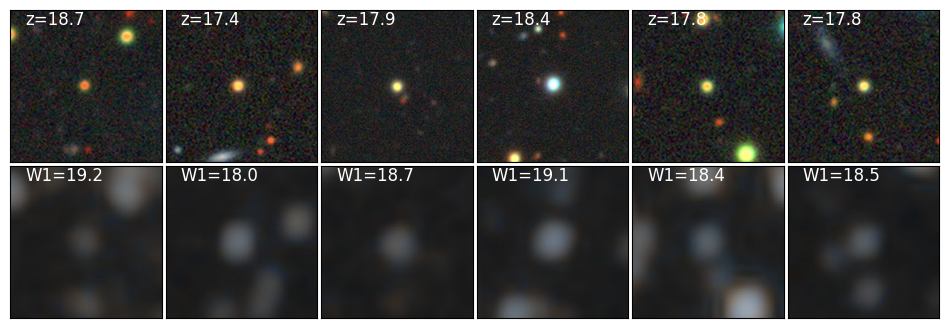

In [20]:
# Graficar imágenes de objetivos seleccionados aleatoriamente que mejor se ajusten a un perfil PSF
# desde el lado "azul" z-W1, con -0,8 < z-W1 < -0,5
de_img,wi_img = make_cutout_comparison_table(ra_blue,dec_blue)
plot_de_wi(de_img,wi_img,zmag_blue,w1_blue)

## Montaje para "Rojo" de *z-W1*

2 de 12 imágenes cargadas.
4 de 12 imágenes cargadas.
6 de 12 imágenes cargadas.
8 de 12 imágenes cargadas.
10 de 12 imágenes cargadas.
12 de 12 imágenes cargadas.


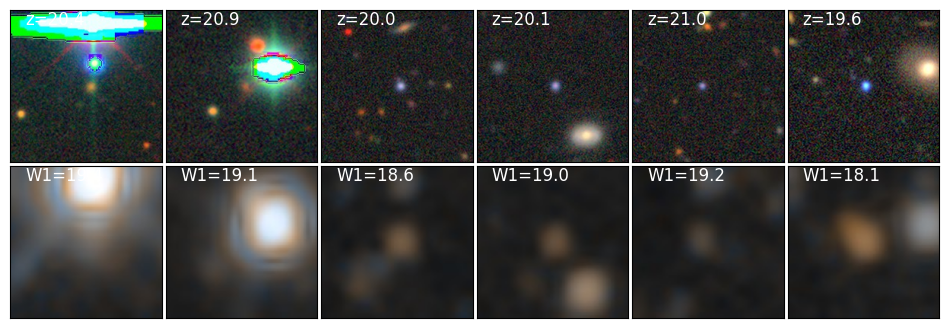

In [21]:
# Graficar imágenes de objetivos seleccionados aleatoriamente que mejor se ajusten a un perfil PSF
# desde el lado "rojo" z-W1, con 1 < z-W1 < 2
de_img,wi_img = make_cutout_comparison_table(ra_red,dec_red)
plot_de_wi(de_img,wi_img,zmag_red,w1_red)